# Introduction

## Data Description
Information about the rates of cancer deaths in each state is reported. The data shows the total rate as well as rates based on sex, age, and race. Rates are also shown for three specific kinds of cancer: breast cancer, colorectal cancer, and lung cancer.

[Dataset Link](https://corgis-edu.github.io/corgis/csv/cancer/)

## Motivations: 
- Understanding demographic patterns: By examining cancer death rates based on sex, age, and race, researchers can gain insights into how different demographic groups may be affected by cancer. This can help identify populations that are particularly vulnerable or may require targeted interventions.
 
- Predictive modeling: By using the dataset to build predictive models, researchers can forecast future cancer death rates based on factors such as population growth, aging demographics, and changes in risk behaviors. This information can help policymakers allocate resources and plan cancer prevention initiatives.



## Main Research Questions:

1. Are there significant differences in total cancer rates among states?
2. How do cancer rates differ between males and females, and across different age groups?
3. Are there variations in cancer rates based on different racial or ethnic groups?
4. Which states have the highest and lowest rates of breast, colorectal, and lung cancer?
5. Are there any correlations between the rates of different types of cancer?
6. Are race and ethnicity risk factors for cancer?



# Methods

First, we need preparation, we are going to use `request` to get the url of the dataset to read the csv file. 

In [14]:
# !pip3 install beautifulsoup4
from bs4 import BeautifulSoup
import requests
# Retrieve the htmnl code of the CORGIS webpage
url = "https://corgis-edu.github.io/corgis/csv/"
response = requests.get(url)
html = response.text
status = response.status_code
soup = BeautifulSoup(html, "html.parser")
h3_contents = soup.find_all('h3')
h3_list = []
for h3_tag in h3_contents:
  h3_list.append(h3_tag.text)

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# reference: Assignment 4
def pdcorgis(a):
  try:
    dataset = a.lower()
    dataset = dataset.replace(' ', '_')
    dataset_url = f"https://corgis-edu.github.io/corgis/csv/{dataset}/"
    response = requests.get(dataset_url)
    html_code = response.text
    status = response.status_code

    soup = BeautifulSoup(html_code, 'html.parser')
    links = soup.find_all('a')

    download_link = None
    for i in links: 
      if i.has_attr('download'):
        download_link = i['href']
        break 
    if download_link:
      csv_url = f"https://corgis-edu.github.io/corgis/csv/{dataset}/{download_link}"
      corgisdf = pd.read_csv(csv_url)
      return corgisdf
    else:
      return None
  except:
    print("An exception ocurred")
cancer_data = pdcorgis("Cancer")


We are firstly have data visualization to investigate if there are significant differences in total cancer rates among states. Use bar plot. This code assumes that the dataset includes the "State" column for the x-axis and "Total.Rate" column for the y-axis.

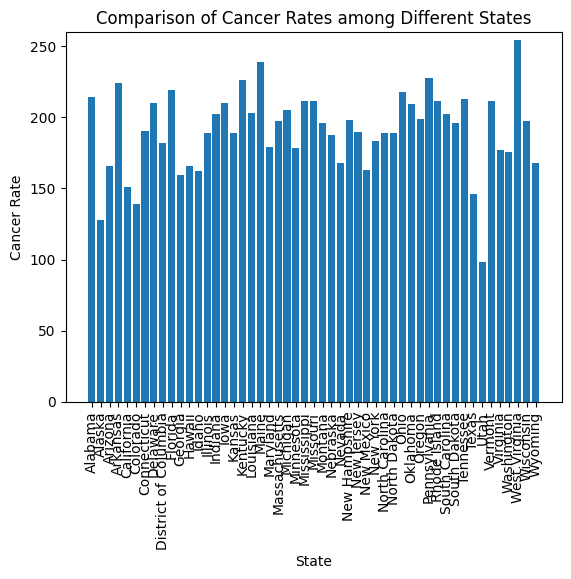

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# refer: https://pythonguides.com/matplotlib-set-y-axis-range/#:~:text=The%20ylim()%20function%20is,use%20the%20ylim()%20function.
# use bar plot to compare different state cancer death rate. 

data_frame = pdcorgis("Cancer")
# data cleaning
states = data_frame["State"]
total_rates = data_frame["Total.Rate"]

# Create a bar plot
plt.bar(states, total_rates)
plt.xlabel("State")
plt.ylabel("Cancer Rate")
plt.title("Comparison of Cancer Rates among Different States")
plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long

plt.ylim(0, 260)
plt.show()

As above figure shown, Utah is the state which has the lowest cancer death rate. And West Virginia is the state with highest cancer death rate.

# Analysis

# Results




# Discussion



